# 1. Employee attirtion 

### 1.1 Importing modules and EDA

In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv("employee_attrition_train.csv")


In [444]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [445]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

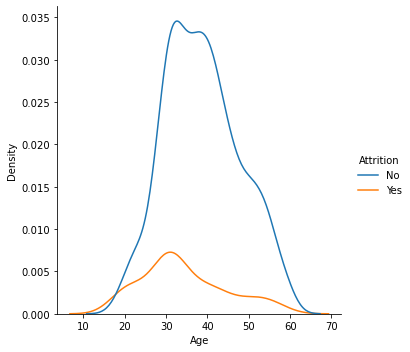

In [446]:
sns.displot(data=train, x="Age", hue="Attrition",kind="kde")

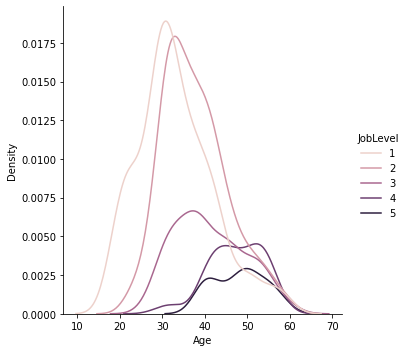

In [447]:
sns.displot(data=train, x="Age", hue="JobLevel",kind="kde")

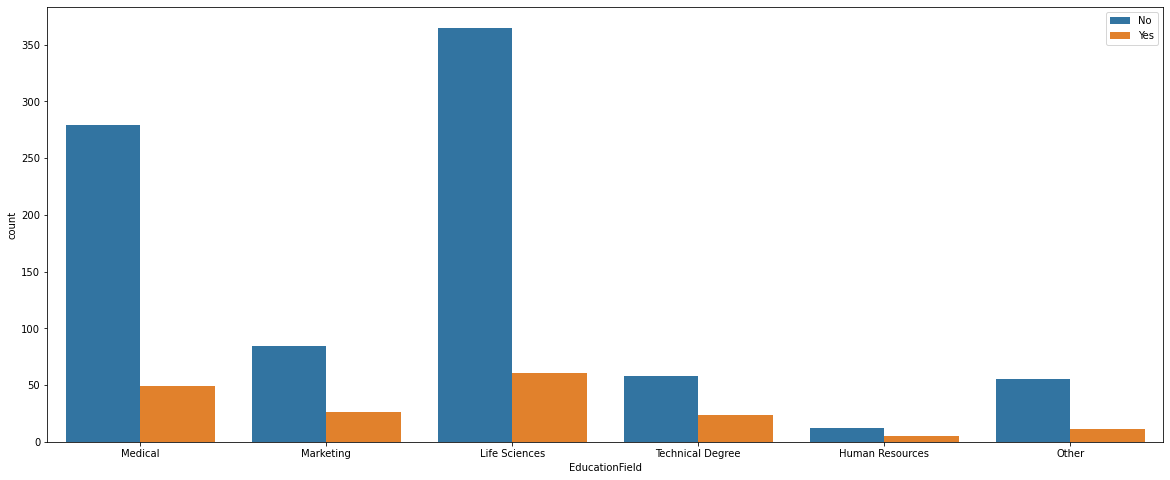

In [448]:
fig,ax=plt.subplots(figsize = (20,8))
sns.countplot(data=train, x="EducationField", hue="Attrition")
ax.legend()
plt.show()

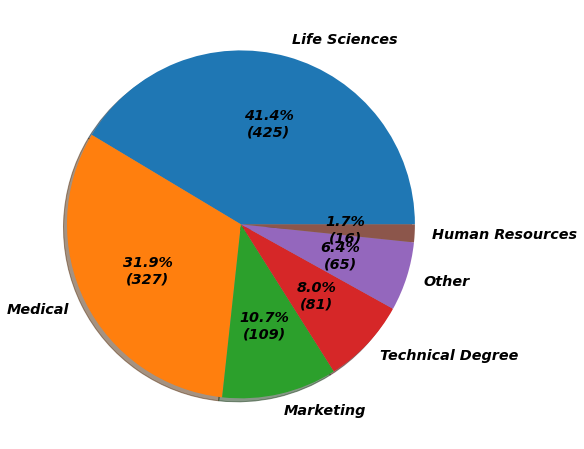

In [449]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize = (12, 8))
job = train.EducationField.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

In [450]:
x=train[train["Attrition"]=="Yes"]

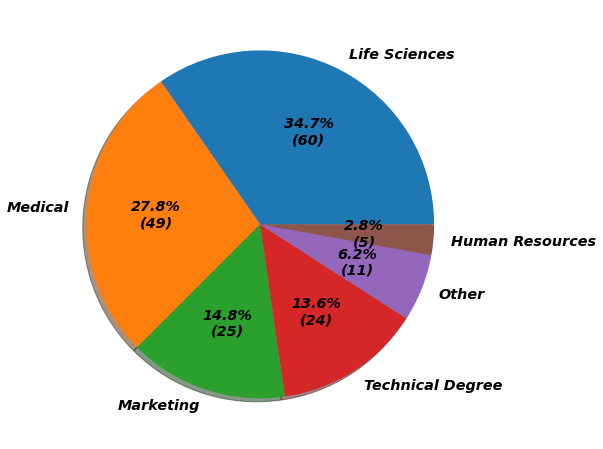

In [451]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize = (12, 8))
job = x.EducationField.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

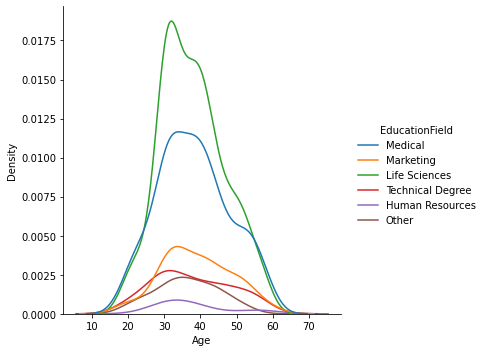

In [452]:
sns.displot(data=train, x="Age", hue="EducationField",kind="kde")

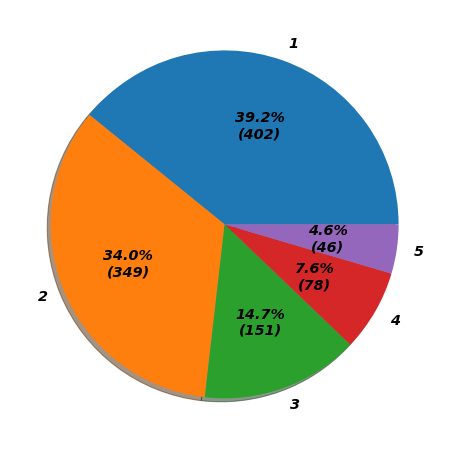

In [453]:
fig, ax = plt.subplots(figsize = (12, 8))
job = train.JobLevel.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

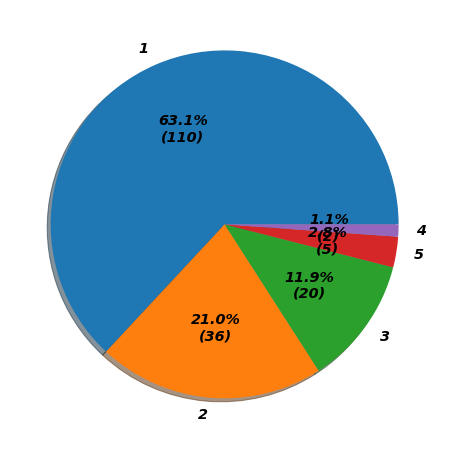

In [454]:
fig, ax = plt.subplots(figsize = (12, 8))
job = x.JobLevel.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

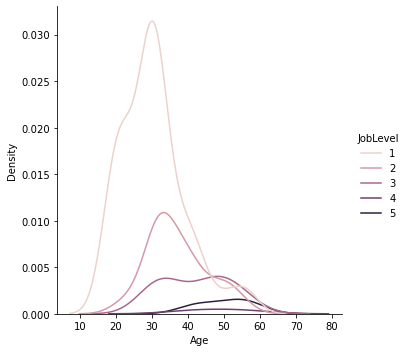

In [455]:
sns.displot(data=x, x="Age", hue="JobLevel",kind="kde")

<AxesSubplot:xlabel='OverTime', ylabel='count'>

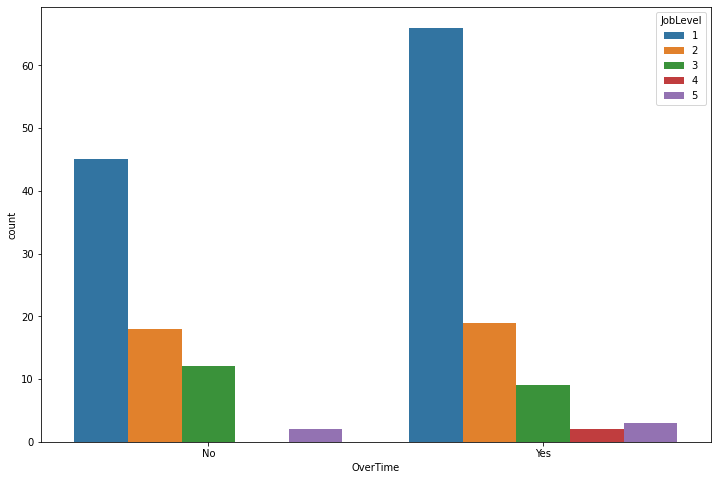

In [456]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(data=x, x="OverTime", hue="JobLevel")

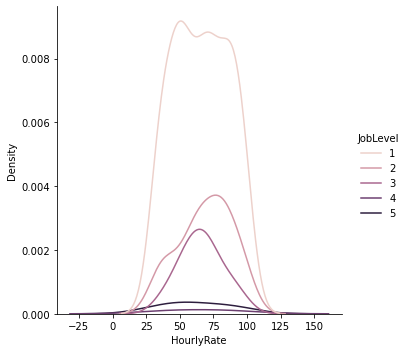

In [457]:
sns.displot(data=x, x="HourlyRate", hue="JobLevel",kind="kde")

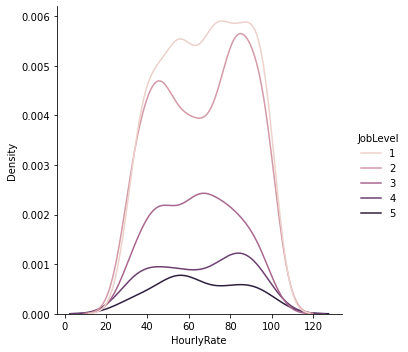

In [458]:
sns.displot(data=train, x="HourlyRate", hue="JobLevel",kind="kde")

In [459]:
a=x[x["OverTime"]=="Yes"]

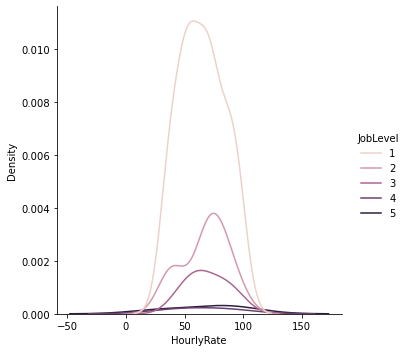

In [460]:
sns.displot(data=a, x="HourlyRate", hue="JobLevel",kind="kde")

 Most of those who tend to be attrited more, are beginners who work overtime because their hourly rate is less than 100

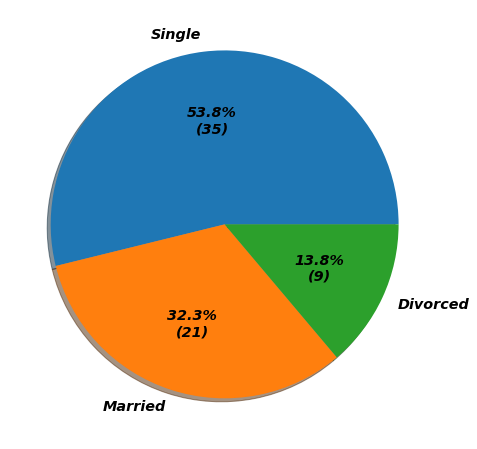

In [461]:
b=a[a["JobLevel"]==1]
fig, ax = plt.subplots(figsize = (12, 8))
marital = b.MaritalStatus.value_counts()
ax.pie(marital.values, labels = marital.index,  shadow = True,
       autopct = lambda pct: func(pct, marital.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

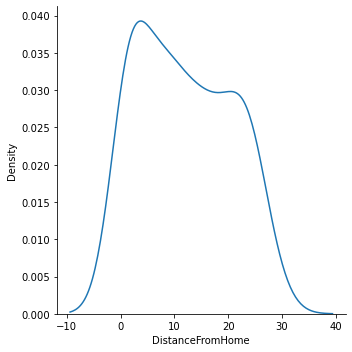

In [462]:
sns.displot(data=a, x="DistanceFromHome", kind="kde")

## 1.2 Filling Null Values

In [463]:
train.isnull().sum() 

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [464]:
train= train.dropna()

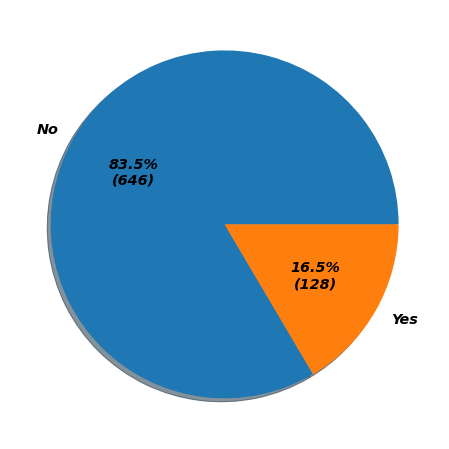

In [465]:
fig, ax = plt.subplots(figsize = (12, 8))
job = train.Attrition.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

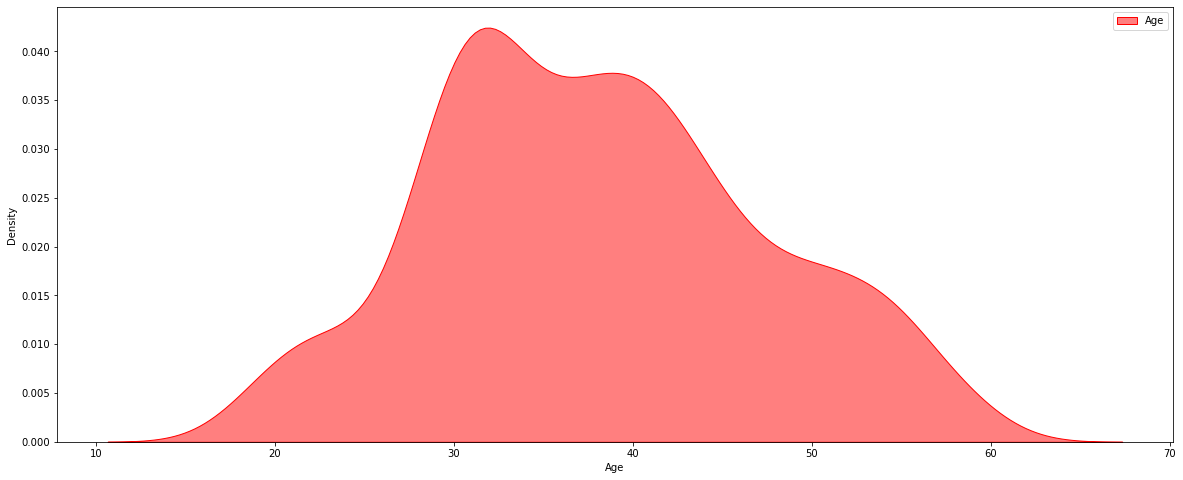

In [466]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["Age"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

In [467]:
train["Age"].describe()

count    775.000000
mean      38.045161
std        9.251400
min       18.000000
25%       31.000000
50%       37.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64

In [468]:
train["Age"].mode

<bound method Series.mode of 0       50.0
1       36.0
2       21.0
4       52.0
5       33.0
        ... 
1020    41.0
1021    33.0
1023    33.0
1027    29.0
1028    50.0
Name: Age, Length: 775, dtype: float64>

In [469]:
train["Age"].fillna( train["Age"].mode()[0], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13996\3446682596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"].fillna( train["Age"].mode()[0], inplace = True)


In [470]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    object 
 2   BusinessTravel            775 non-null    object 
 3   DailyRate                 775 non-null    float64
 4   Department                775 non-null    object 
 5   DistanceFromHome          775 non-null    float64
 6   Education                 775 non-null    int64  
 7   EducationField            775 non-null    object 
 8   EmployeeCount             775 non-null    int64  
 9   EmployeeNumber            775 non-null    int64  
 10  EnvironmentSatisfaction   775 non-null    int64  
 11  Gender                    775 non-null    object 
 12  HourlyRate                775 non-null    int64  
 13  JobInvolvement            775 non-null    int64  
 14  JobLevel 

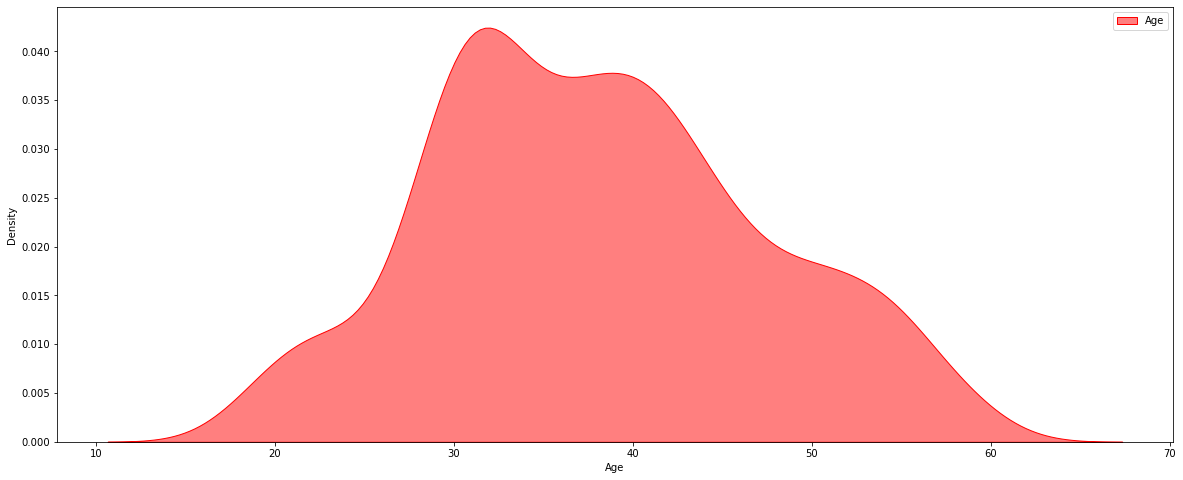

In [471]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["Age"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

In [472]:
train["BusinessTravel"].value_counts()

Travel_Rarely        537
Travel_Frequently    153
Non-Travel            85
Name: BusinessTravel, dtype: int64

In [473]:
fill_list = train["BusinessTravel"].dropna().tolist()
train["BusinessTravel"] = train["BusinessTravel"].fillna(pd.Series(np.random.choice(fill_list , size = len(train.index))))

C:\Users\HP\AppData\Local\Temp\ipykernel_13996\4112972026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["BusinessTravel"] = train["BusinessTravel"].fillna(pd.Series(np.random.choice(fill_list , size = len(train.index))))


In [474]:
train["BusinessTravel"].isnull().sum()

0

In [475]:
train["BusinessTravel"].value_counts()

Travel_Rarely        537
Travel_Frequently    153
Non-Travel            85
Name: BusinessTravel, dtype: int64

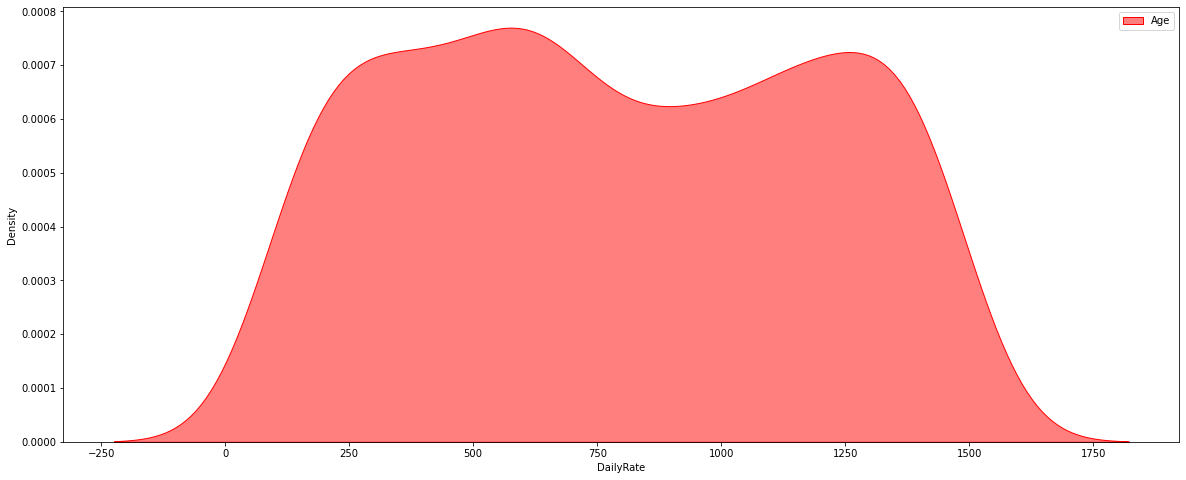

In [476]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["DailyRate"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

In [477]:
train["DailyRate"].describe()

count     775.000000
mean      786.370323
std       411.095066
min       102.000000
25%       431.500000
50%       750.000000
75%      1148.500000
max      1495.000000
Name: DailyRate, dtype: float64

In [478]:
train["DailyRate"].fillna( train["DailyRate"].mean(), inplace = True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13996\2738922650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["DailyRate"].fillna( train["DailyRate"].mean(), inplace = True)


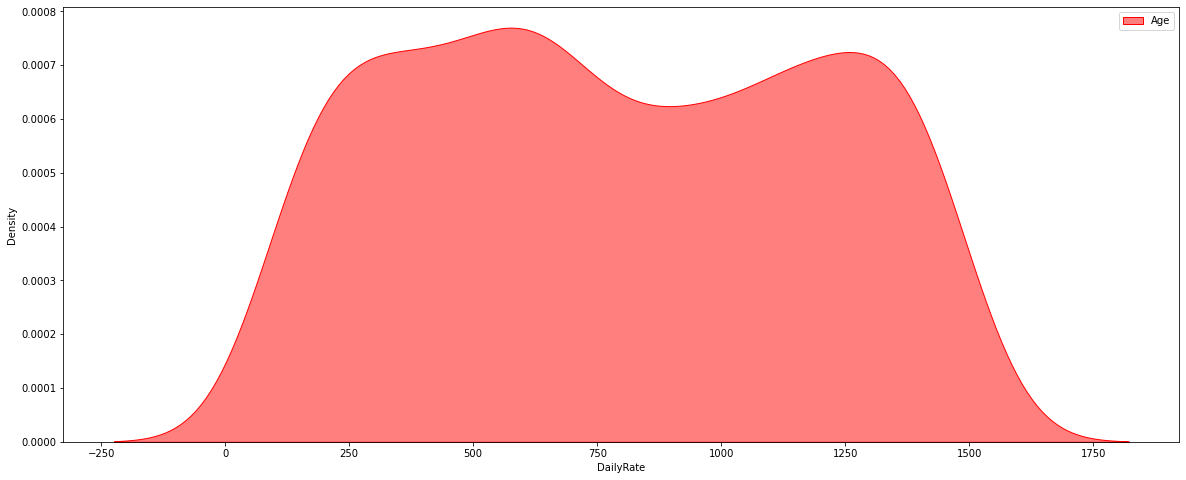

In [479]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["DailyRate"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

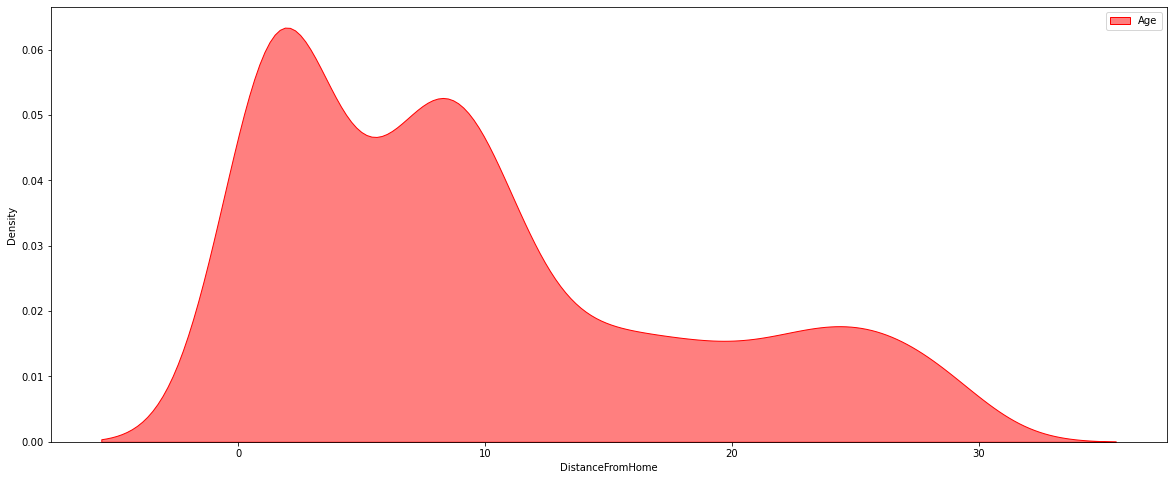

In [480]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["DistanceFromHome"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

In [481]:
train["DistanceFromHome"].describe()

count    775.000000
mean       9.680000
std        8.257065
min        1.000000
25%        2.000000
50%        8.000000
75%       15.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [482]:
train["DistanceFromHome"].fillna( train["DistanceFromHome"].mean(), inplace = True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13996\4006136198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["DistanceFromHome"].fillna( train["DistanceFromHome"].mean(), inplace = True)


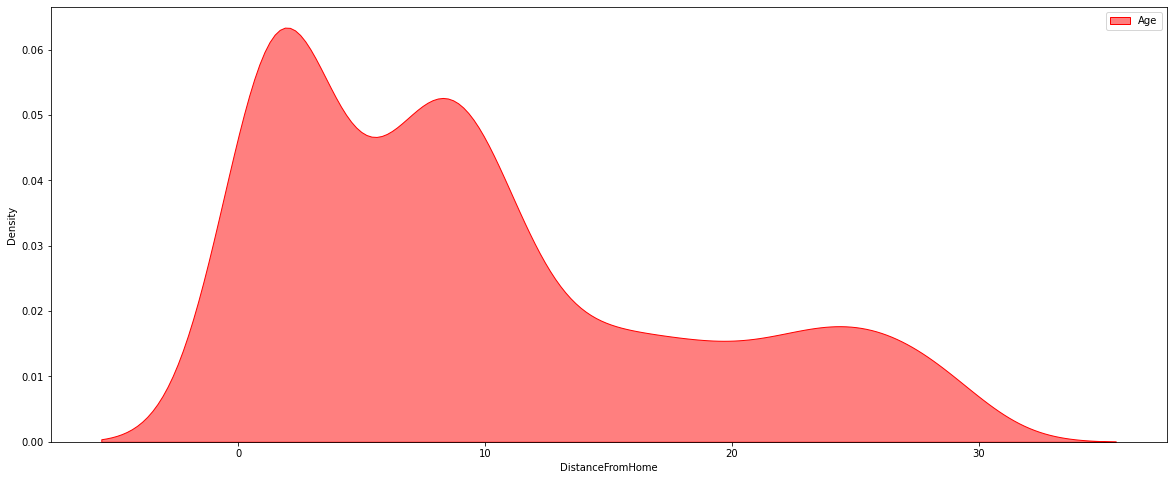

In [483]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(train["DistanceFromHome"], alpha=0.5,shade = True, color="red", label="Age")

ax.legend()
plt.show()

In [484]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    object 
 2   BusinessTravel            775 non-null    object 
 3   DailyRate                 775 non-null    float64
 4   Department                775 non-null    object 
 5   DistanceFromHome          775 non-null    float64
 6   Education                 775 non-null    int64  
 7   EducationField            775 non-null    object 
 8   EmployeeCount             775 non-null    int64  
 9   EmployeeNumber            775 non-null    int64  
 10  EnvironmentSatisfaction   775 non-null    int64  
 11  Gender                    775 non-null    object 
 12  HourlyRate                775 non-null    int64  
 13  JobInvolvement            775 non-null    int64  
 14  JobLevel 

In [485]:
train["MaritalStatus"].value_counts()

Married     360
Single      243
Divorced    172
Name: MaritalStatus, dtype: int64

In [486]:
fill_list = train["MaritalStatus"].dropna().tolist()
train["MaritalStatus"] = train["MaritalStatus"].fillna(pd.Series(np.random.choice(fill_list , size = len(train.index))))

In [487]:
train.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [488]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    object 
 2   BusinessTravel            775 non-null    object 
 3   DailyRate                 775 non-null    float64
 4   Department                775 non-null    object 
 5   DistanceFromHome          775 non-null    float64
 6   Education                 775 non-null    int64  
 7   EducationField            775 non-null    object 
 8   EmployeeCount             775 non-null    int64  
 9   EmployeeNumber            775 non-null    int64  
 10  EnvironmentSatisfaction   775 non-null    int64  
 11  Gender                    775 non-null    object 
 12  HourlyRate                775 non-null    int64  
 13  JobInvolvement            775 non-null    int64  
 14  JobLevel 

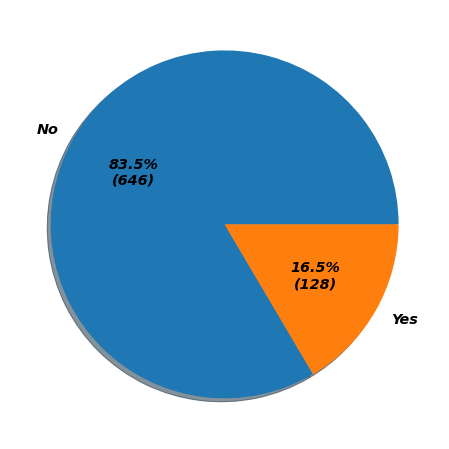

In [489]:
fig, ax = plt.subplots(figsize = (12, 8))
job = train.Attrition.value_counts()
ax.pie(job.values, labels = job.index,  shadow = True,
       autopct = lambda pct: func(pct, job.values),
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})

plt.show()

## 1.3Encoding & preprocessing

In [490]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    object 
 2   BusinessTravel            775 non-null    object 
 3   DailyRate                 775 non-null    float64
 4   Department                775 non-null    object 
 5   DistanceFromHome          775 non-null    float64
 6   Education                 775 non-null    int64  
 7   EducationField            775 non-null    object 
 8   EmployeeCount             775 non-null    int64  
 9   EmployeeNumber            775 non-null    int64  
 10  EnvironmentSatisfaction   775 non-null    int64  
 11  Gender                    775 non-null    object 
 12  HourlyRate                775 non-null    int64  
 13  JobInvolvement            775 non-null    int64  
 14  JobLevel 

In [491]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,...,4,80,0,15,2,4,7,6,7,7


In [492]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [493]:
train=train[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]


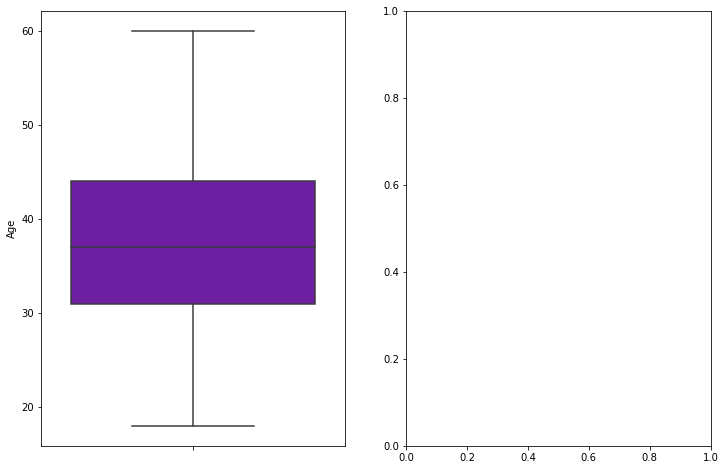

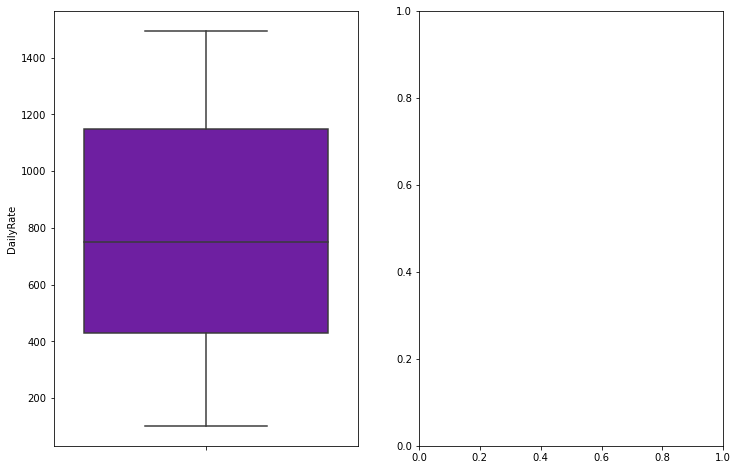

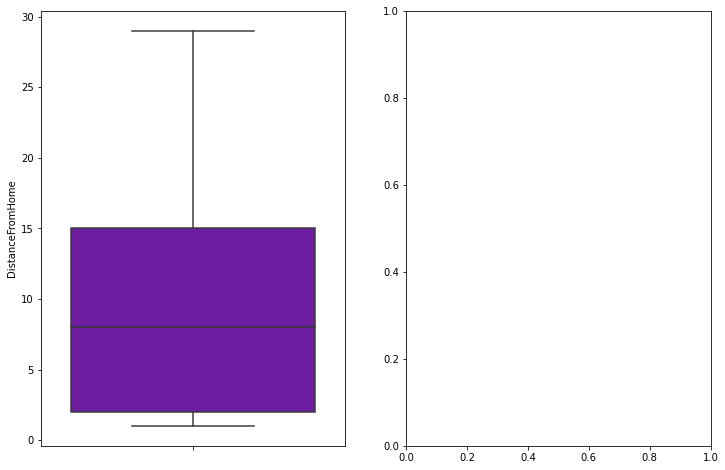

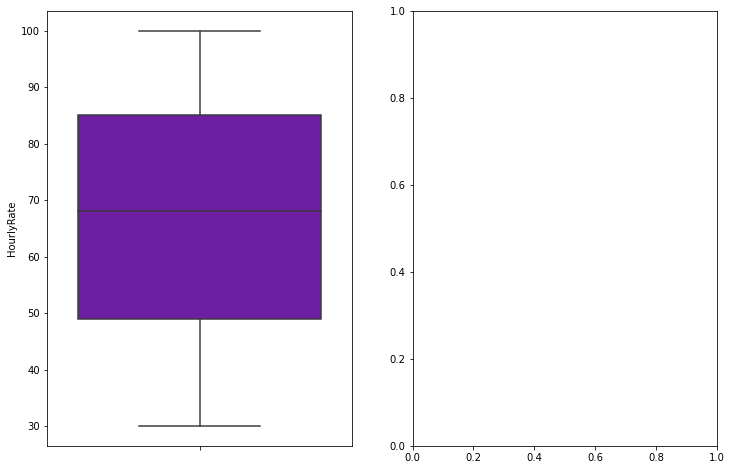

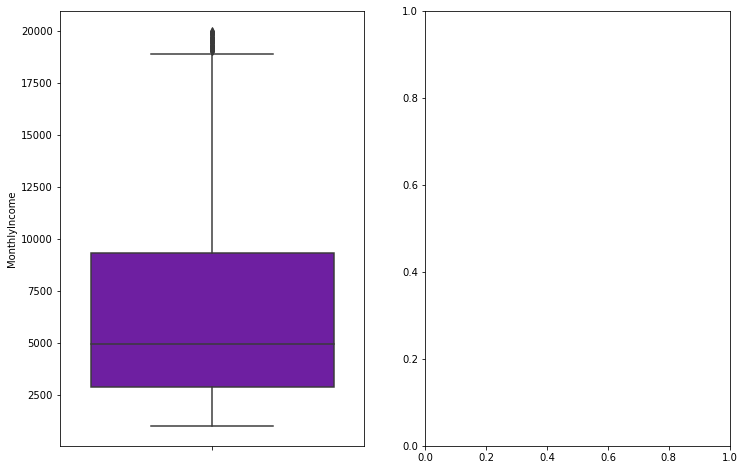

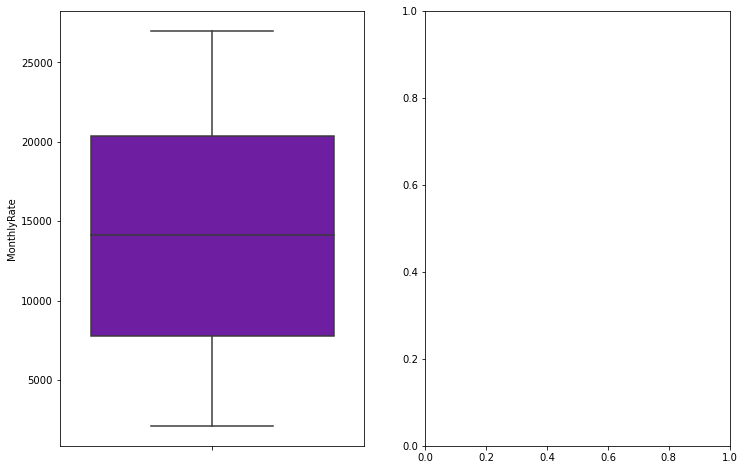

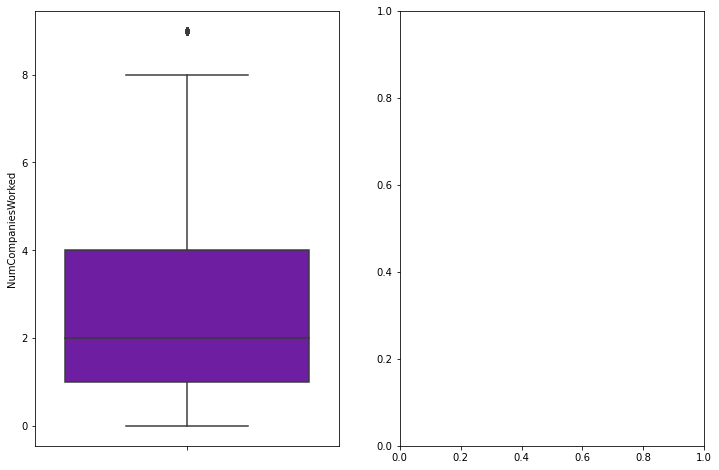

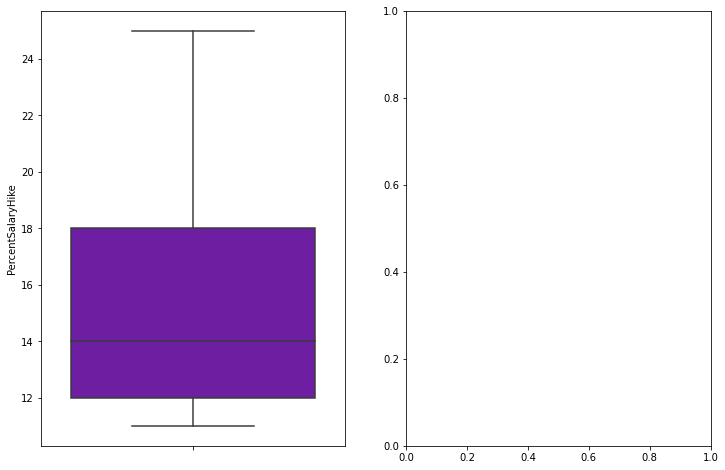

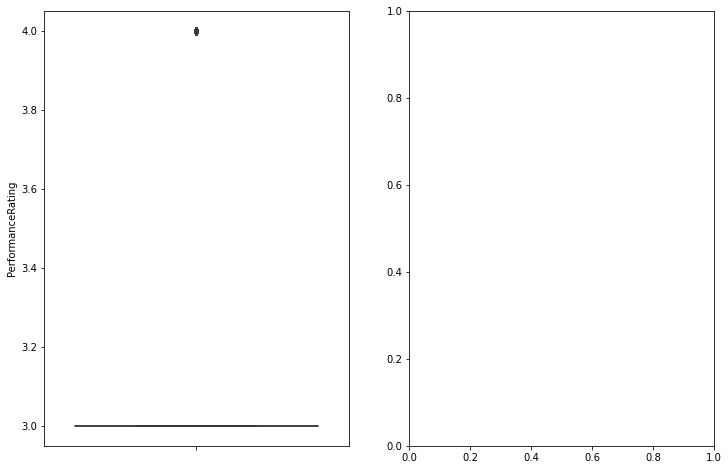

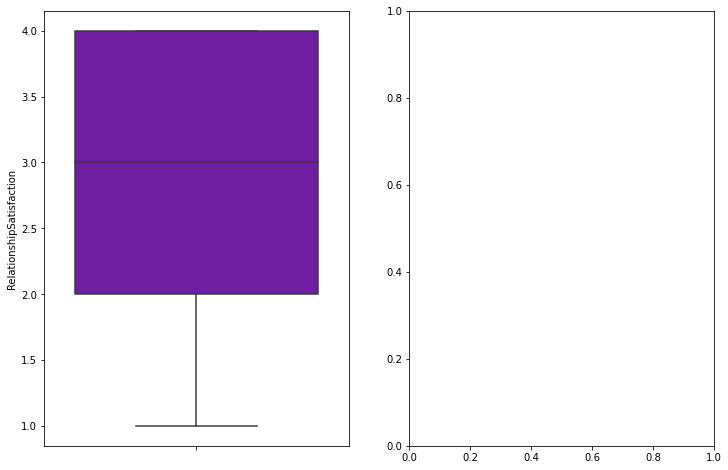

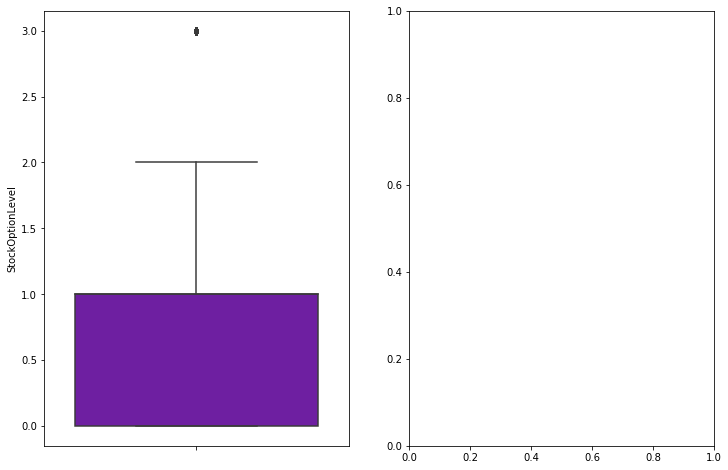

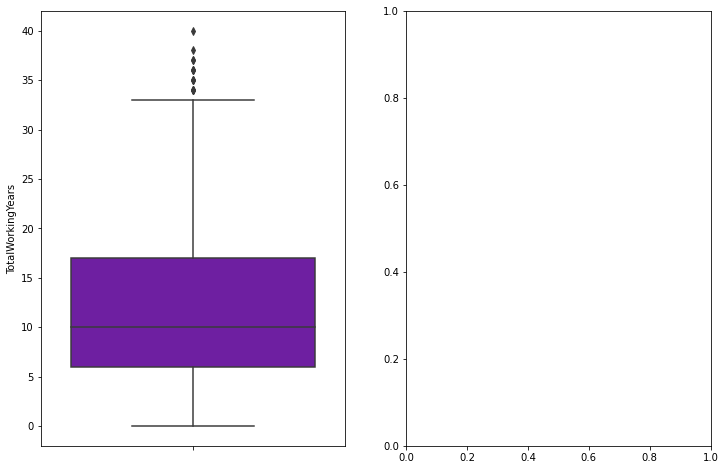

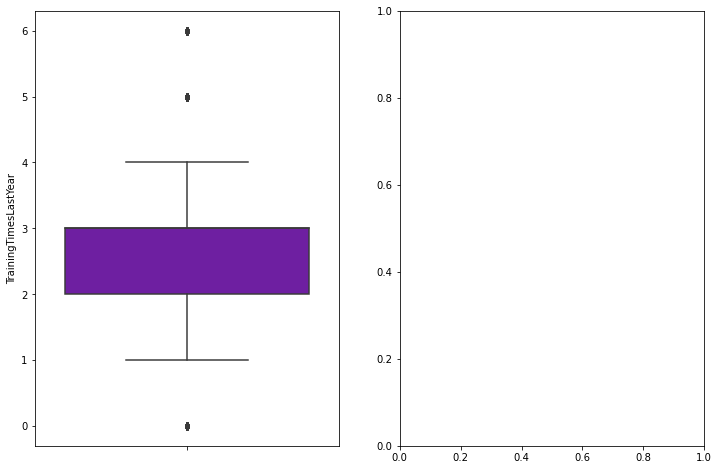

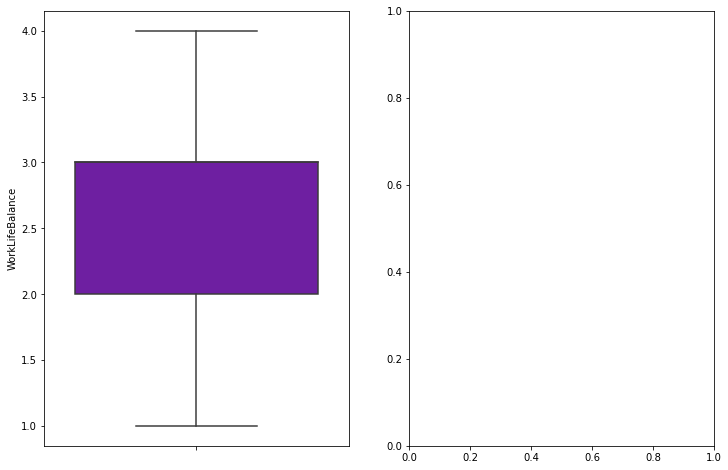

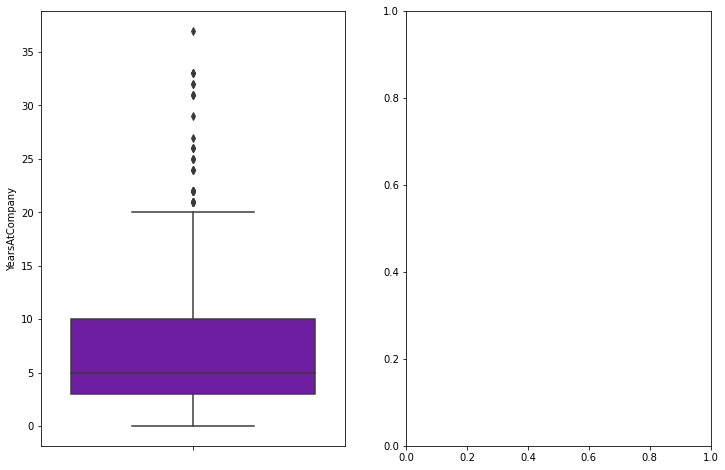

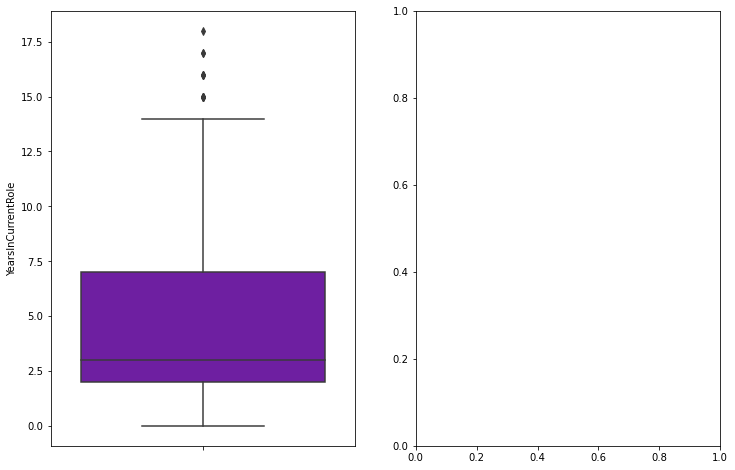

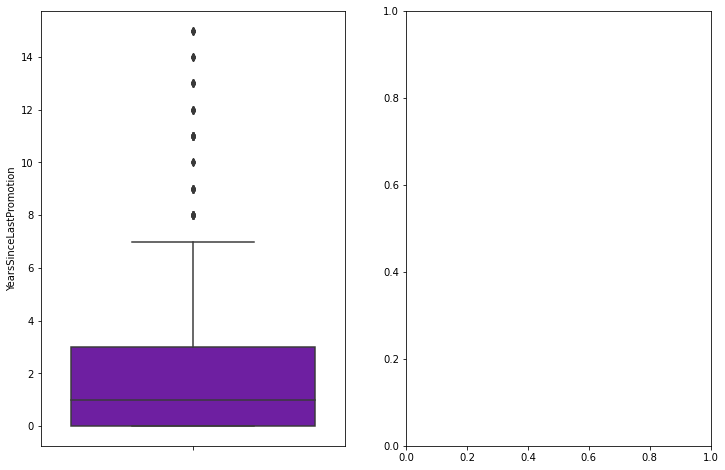

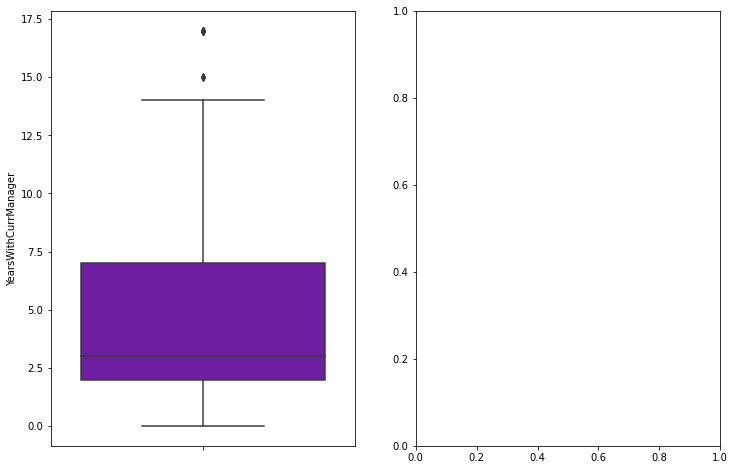

In [494]:
for i in['Age', 'DailyRate',
       'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
         'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=train, y=i, ax=ax[0], color='#7209b7')
    plt.show()

In [495]:
outlier_percentage = {}

for feature in ['Age', 'DailyRate',
       'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
         'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']:
    tempData = train.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'Age': 0.0,
 'DailyRate': 0.0,
 'DistanceFromHome': 0.0,
 'HourlyRate': 0.0,
 'MonthlyIncome': 3.87,
 'MonthlyRate': 0.0,
 'NumCompaniesWorked': 3.74,
 'PercentSalaryHike': 0.0,
 'PerformanceRating': 16.0,
 'RelationshipSatisfaction': 0.0,
 'StockOptionLevel': 7.35,
 'TotalWorkingYears': 1.81,
 'TrainingTimesLastYear': 14.84,
 'WorkLifeBalance': 0.0,
 'YearsAtCompany': 5.03,
 'YearsInCurrentRole': 1.68,
 'YearsSinceLastPromotion': 8.39,
 'YearsWithCurrManager': 1.03}

In [496]:
le = LabelEncoder()
train['BusinessTravel'] = le.fit_transform(train['BusinessTravel'])
train['Attrition'] = le.fit_transform(train['Attrition'])
train['Department'] = le.fit_transform(train['Department'])
train['EducationField'] = le.fit_transform(train['EducationField'])
train['Gender'] = le.fit_transform(train['Gender'])
train['JobRole'] = le.fit_transform(train['JobRole'])
train['MaritalStatus'] = le.fit_transform(train['MaritalStatus'])

train['OverTime'] = le.fit_transform(train['OverTime'])

In [497]:
train.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172057,0.047119,0.046299,-0.041584,-0.022593,0.226617,-0.022388,-0.020728,-0.003659,...,-0.018882,0.062269,-0.002584,0.677544,-0.023599,-0.051263,0.298190,0.225110,0.191843,0.184328
Attrition,-0.172057,1.000000,0.037544,-0.033084,0.055414,0.045463,-0.020911,0.064709,-0.094650,0.047417,...,-0.004550,-0.019125,-0.148165,-0.193748,-0.046285,-0.060773,-0.145191,-0.186045,-0.056915,-0.165280
BusinessTravel,0.047119,0.037544,1.000000,-0.013387,-0.025418,-0.077346,0.013011,0.020412,-0.007501,-0.032678,...,-0.053414,-0.031601,-0.000027,0.046802,0.040227,-0.044058,-0.004877,0.008193,0.016321,-0.006819
DailyRate,0.046299,-0.033084,-0.013387,1.000000,-0.001529,-0.031727,-0.063184,0.056257,-0.002455,-0.004436,...,0.010230,0.029875,0.044841,0.024895,0.018572,-0.031818,-0.037932,-0.004801,-0.044773,-0.054359
Department,-0.041584,0.055414,-0.025418,-0.001529,1.000000,-0.000216,0.015872,0.031408,-0.039799,-0.038418,...,-0.017837,-0.019625,-0.012207,-0.040652,0.075303,0.010547,0.029762,0.042592,0.028037,0.032873
DistanceFromHome,-0.022593,0.045463,-0.077346,-0.031727,-0.000216,1.000000,0.001979,-0.007215,-0.063854,-0.043711,...,0.033133,-0.022220,0.014773,0.012793,-0.055737,0.003839,-0.000540,0.011286,-0.029341,0.022248
Education,0.226617,-0.020911,0.013011,-0.063184,0.015872,0.001979,1.000000,-0.051323,-0.067322,-0.026699,...,-0.012386,0.007283,0.013609,0.143305,0.000859,0.012329,0.054871,0.073693,0.045556,0.070239
EducationField,-0.022388,0.064709,0.020412,0.056257,0.031408,-0.007215,-0.051323,1.000000,0.031704,-0.040078,...,-0.031577,0.017271,-0.013270,-0.013410,0.040998,0.024236,-0.009283,0.007785,0.063139,-0.012012
EnvironmentSatisfaction,-0.020728,-0.094650,-0.007501,-0.002455,-0.039799,-0.063854,-0.067322,0.031704,1.000000,-0.019457,...,-0.010595,-0.008418,0.006010,-0.005257,-0.005939,0.015011,0.018899,0.014749,0.030750,-0.009229
Gender,-0.003659,0.047417,-0.032678,-0.004436,-0.038418,-0.043711,-0.026699,-0.040078,-0.019457,1.000000,...,0.014920,0.047884,0.025066,-0.080069,-0.030775,0.001908,-0.066373,-0.073127,0.003548,-0.078846


In [498]:
train["DistanceFromHome"].describe()

count    775.000000
mean       9.680000
std        8.257065
min        1.000000
25%        2.000000
50%        8.000000
75%       15.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [499]:
train["NumCompaniesWorked"].describe()

count    775.000000
mean       2.758710
std        2.553277
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: NumCompaniesWorked, dtype: float64

In [500]:
train=train[train["NumCompaniesWorked"]<8]

## 1.4 Splitting and Scaling the data

In [501]:
from sklearn.model_selection import train_test_split
x=train.drop('Attrition',axis=1)
y=train['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)


In [502]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## 1.5 Modeling and evaluation

### 1.5.1 Logistic regression

In [503]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [504]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[156   1]
 [ 18   5]]


0.8944444444444445

In [505]:
from sklearn.metrics import classification_report, confusion_matrix
dataout = classification_report(y_test, y_pred, output_dict=True)
dataout = pd.DataFrame(dataout).transpose()
dataout

,precision,recall,f1-score,support
0,0.896552,0.993631,0.942598,157.000000
1,0.833333,0.217391,0.344828,23.000000
accuracy,0.894444,0.894444,0.894444,0.894444
macro avg,0.864943,0.605511,0.643713,180.000000
weighted avg,0.888474,0.894444,0.866216,180.000000


### 1.5.2 KNN

In [432]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [433]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[155   2]
 [ 20   3]]


0.8777777777777778

In [434]:
from sklearn.metrics import classification_report, confusion_matrix
dataout = classification_report(y_test, y_pred, output_dict=True)
dataout = pd.DataFrame(dataout).transpose()
dataout

,precision,recall,f1-score,support
0,0.885714,0.987261,0.933735,157.000000
1,0.600000,0.130435,0.214286,23.000000
accuracy,0.877778,0.877778,0.877778,0.877778
macro avg,0.742857,0.558848,0.574010,180.000000
weighted avg,0.849206,0.877778,0.841805,180.000000


### 1.5.3 Decision Tree

In [435]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [436]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[130  27]
 [ 16   7]]


0.7611111111111111

In [437]:
from sklearn.metrics import classification_report, confusion_matrix
dataout = classification_report(y_test, y_pred, output_dict=True)
dataout = pd.DataFrame(dataout).transpose()
dataout

,precision,recall,f1-score,support
0,0.890411,0.828025,0.858086,157.000000
1,0.205882,0.304348,0.245614,23.000000
accuracy,0.761111,0.761111,0.761111,0.761111
macro avg,0.548147,0.566187,0.551850,180.000000
weighted avg,0.802943,0.761111,0.779826,180.000000


### 1.5.4 Random forest

In [438]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [439]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153   4]
 [ 20   3]]


0.8666666666666667

In [440]:
from sklearn.metrics import classification_report, confusion_matrix
dataout = classification_report(y_test, y_pred, output_dict=True)
dataout = pd.DataFrame(dataout).transpose()
dataout

,precision,recall,f1-score,support
0,0.884393,0.974522,0.927273,157.000000
1,0.428571,0.130435,0.200000,23.000000
accuracy,0.866667,0.866667,0.866667,0.866667
macro avg,0.656482,0.552479,0.563636,180.000000
weighted avg,0.826149,0.866667,0.834343,180.000000


In [506]:
# from flask import Flask,jsonify,request,render_template
# # from model import TextClassification
# app = Flask(__name__)
# # tc = TextClassification() ## get data,preprocess and train
# ###########################
# @app.route("/", methods=('GET', 'POST'))
# def home():
#     return render_template('index.html')

# # @app.route("/train")
# # def train():
# #     tc.model_train()
    
# #     return render_template('result.html',message='model trained successfully')

# # @app.route("/evaluate")
# # def evaluate():
# #     score = tc.model_evaluate()
# #     return render_template('result.html',message = 'Your model score is '+str(score))

# # @app.route("/predict_gui")
# # def predict_gui():
# #     return render_template('predict.html')
    
# # @app.route("/predict")
# # def predict():
# #     text  = request.args['text']
# #     label = tc.model_predict(text)
# #     return render_template('result.html',message = 'Your data label is '+str(label),label=label)
# ###########################
# app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
